## Dataset Turbina Eolica

1. Otimização do desempenho de geradores eólicos e fotovoltaicos:

Objetivo: Maximizar a geração de energia considerando restrições operacionais (velocidade do vento, irradiação solar, limites de potência).
Variáveis Individuais: Ângulo da pá do rotor (eólico), ângulo de inclinação do painel (fotovoltaico).
Função de Avaliação: Potência gerada menos penalidades por violação de restrições.
Exemplos de uso:
Aumentar a geração de energia de um parque eólico durante uma rajada de vento.
Maximizar a produção de energia solar em diferentes horários do dia.
2. Controle de turbinas eólicas:

Objetivo: Manter a velocidade de rotação da turbina em torno de um valor de referência, considerando perturbações de vento.
Variáveis Individuais: Ganho do controlador de passo da pá.
Função de Avaliação: Desvio da velocidade de rotação em relação ao valor de referência.
Exemplos de uso:
Adaptar o controle da turbina a diferentes condições de vento.
Reduzir o desgaste mecânico da turbina minimizando oscilações de velocidade.
3. Sincronização de geradores:

Objetivo: Alcançar e manter a mesma frequência e fase entre dois ou mais geradores conectados à rede.
Variáveis Individuais: Ajustes de ângulo de fase e frequência nas excitatrizes dos geradores.
Função de Avaliação: Diferença de frequência e fase entre os geradores.
Exemplos de uso:
Sincronizar um novo gerador à rede elétrica.
Manter a estabilidade da rede em caso de perturbações.

In [1]:
from src.models.AlgEvolution import AlgEvolution
from src.models.new_alg_evolution import AlgoritimoEvolutivoRCE
from src.models.Setup import Setup
from src.models.DataExploration import DataExploration
import time
from src.backend.pdf_generator import PDFGenerator
import json
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import math

# Carregar os dados
turbina = pd.read_csv('/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/datasets/T1.csv')
turbina.columns = ['Data/hora', 'ActivePower(kW)', 'WindSpeed(m/s)', 'Curva_Teórica(KWh)',"Direção do Vento"]
display(turbina.head())

# Selecionar características e separar em X e y
X = turbina[['WindSpeed(m/s)']].values
y = turbina[['ActivePower(kW)']].values

print(X.shape,y.shape)


# Definir a função de aptidão (fitness function) para a Turbina
def fitness_function_turbina(individual, decision_variables):
    X, y = decision_variables
    # Calcular a diferença absoluta entre a potência ativa medida e a potência teórica esperada
    diff = abs(y - individual * X)
    # Calcular a aptidão como a negação da diferença, para maximizar a semelhança
    return np.mean(diff)

def rastrigin_decisionVariables( individual, decision_variables):
        rastrigin = 10 * len(decision_variables)
        for i in range(len(decision_variables)):
            rastrigin += individual[i] * individual[i] - 10 * (
                math.cos(2 * np.pi * individual[i])
            )
        return rastrigin


def load_params(file_path):
    with open(file_path, "r") as file:
        params = json.load(file)
    return params


,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh),Direção do Vento
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


(50530, 1) (50530, 1)


## Evolition RCE turbina

Método escolhido: Minimizar
{'Media': nan, 'STD': nan}
{'Media': 2.6507310513580506, 'STD': 0.0}
{'Media': 2.6507310513580506, 'STD': 0.0}
{'Media': 5.18299484606217, 'STD': 0.0}
{'Media': 4.7805065711320704, 'STD': 0.0}
{'Media': 2.6507310513580506, 'STD': 0.0}


{'Media': 1.8982698484809113, 'STD': 0.0}
{'Media': 1.1814685981510706, 'STD': 0.0}
{'Media': 1.1814685981510706, 'STD': 0.0}
{'Media': 1.1814685981510706, 'STD': 0.0}


/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/lib/python3.11/site-packages/numpy/core/_m

{'Media': 1.1814685981510706, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 1.1814685981510706, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 15.242091227526931, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}

RCE being applied!  - Generation = 20 
TAMANHO ATUAL DE TODOS INDIVIDUOS 2000


Melhor da geração: 1
Name: Generations, dtype: int64


,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,1,0,"[0.8909931229641108, 0.20933966690699213, 0.73...",(),NaN,NaN,-


()

	 CRITÉRIO 1 RCE - 30% dos melhores fitness de cada geração


	 CRITÉRIO 2 - Comparar as variáveis de decisão de cada indivíduo e verificar se existem 3 diferentes.

Indivíduo Index(67) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(17) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(81) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(65) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(60) diferente adicionado ao conjunto elite:  O.O  
Conjunto Elite atualizado!  ultimo inserido =  {'Generations': 20, 'index': 60, 'Variaveis de Decisão': [0.01727207707168199, 0.00469642370207668, 2.29283353313902, 0.7951407943076557, -1.290637371239229, 0.8376383878189795, 0.1736650962090327, 0.30724604331146466, 0.8298565382283138, 0.41590017978415794], 'Fitness': (0.06350297615149358,), 'Media': 0.06350297615149358, 'Desvio Padrao': 0.0, 'RCE': ' - '}

	 CRITERIO 3 - CONJUNTO ELITE (20%) com o restante aleatorio(80%)

Taxa Candidatos el

,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,3,67,"[2.654571021181383, 0.8817632124476893, 0.8137...","(26.102284199865856,)",2.650731,0.0,SIM
1,9,17,"[0.01727207707168199, -0.2785609207357883, 0.8...","(11.921642991674613,)",1.181469,0.0,SIM
2,20,81,"[0.01727207707168199, 0.20382207275583258, 2.2...","(7.239764280797105,)",0.063503,0.0,SIM
3,20,65,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,SIM
4,20,60,"[0.01727207707168199, 0.00469642370207668, 2.2...","(0.06350297615149358,)",0.063503,0.0,SIM
...,...,...,...,...,...,...,...
1988,20,88,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,NÃO
1991,20,91,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,NÃO
1922,20,22,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,NÃO
1956,20,56,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,NÃO


{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}

RCE being applied!  - Generation = 40 
TAMANHO ATUAL DE TODOS INDIVIDUOS 4000


Melhor da geração: 1
Name: Generations, dtype: int64


,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,1,0,"[0.8909931229641108, 0.20933966690699213, 0.73...",(),NaN,NaN,-


()

	 CRITÉRIO 1 RCE - 30% dos melhores fitness de cada geração


	 CRITÉRIO 2 - Comparar as variáveis de decisão de cada indivíduo e verificar se existem 3 diferentes.

Indivíduo Index(57) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(63) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(73) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(70) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(8) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(89) diferente adicionado ao conjunto elite:  O.O  
Conjunto Elite atualizado!  ultimo inserido =  {'Generations': 40, 'index': 89, 'Variaveis de Decisão': [1.8838340079206528, 0.4307199473773263, 0.9613410929319066, 0.6456237276252471, 0.45481196942000135, 0.38724097553036885, 0.3958536907506811, 0.6779640720390515, 0.8298565382283138, 0.6319776903177845], 'Fitness': (25.349327351717726,), 'Media': 0.06350297615149358, 'Desvio Padrao': 0.0, 'RCE': ' - '}

	 CRITERIO 3 - CONJU

,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,3,67,"[2.654571021181383, 0.8817632124476893, 0.8137...","(26.102284199865856,)",2.650731,0.0,SIM
1,9,17,"[0.01727207707168199, -0.2785609207357883, 0.8...","(11.921642991674613,)",1.181469,0.0,SIM
2,20,81,"[0.01727207707168199, 0.20382207275583258, 2.2...","(7.239764280797105,)",0.063503,0.0,SIM
3,20,65,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,SIM
4,20,60,"[0.01727207707168199, 0.00469642370207668, 2.2...","(0.06350297615149358,)",0.063503,0.0,SIM
...,...,...,...,...,...,...,...
3940,40,40,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,NÃO
3910,40,10,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,NÃO
3917,40,17,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,NÃO
3977,40,77,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,NÃO


{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}

RCE being applied!  - Generation = 60 
TAMANHO ATUAL DE TODOS INDIVIDUOS 6000


Melhor da geração: 1
Name: Generations, dtype: int64


,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,1,0,"[0.8909931229641108, 0.20933966690699213, 0.73...",(),NaN,NaN,-


()

	 CRITÉRIO 1 RCE - 30% dos melhores fitness de cada geração


	 CRITÉRIO 2 - Comparar as variáveis de decisão de cada indivíduo e verificar se existem 3 diferentes.

Indivíduo Index(37) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(64) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(72) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(71) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(0) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(55) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(75) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(68) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(1) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(59) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(58) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(16) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(42) diferent

,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,3,67,"[2.654571021181383, 0.8817632124476893, 0.8137...","(26.102284199865856,)",2.650731,0.0,SIM
1,9,17,"[0.01727207707168199, -0.2785609207357883, 0.8...","(11.921642991674613,)",1.181469,0.0,SIM
2,20,81,"[0.01727207707168199, 0.20382207275583258, 2.2...","(7.239764280797105,)",0.063503,0.0,SIM
3,20,65,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,SIM
4,20,60,"[0.01727207707168199, 0.00469642370207668, 2.2...","(0.06350297615149358,)",0.063503,0.0,SIM
...,...,...,...,...,...,...,...
5974,60,74,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,NÃO
5938,60,38,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,NÃO
5977,60,77,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,NÃO
5937,60,37,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,NÃO


{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.06350297615149358, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}

RCE being applied!  - Generation = 80 
TAMANHO ATUAL DE TODOS INDIVIDUOS 8000


Melhor da geração: 1
Name: Generations, dty

,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,1,0,"[0.8909931229641108, 0.20933966690699213, 0.73...",(),NaN,NaN,-


()

	 CRITÉRIO 1 RCE - 30% dos melhores fitness de cada geração


	 CRITÉRIO 2 - Comparar as variáveis de decisão de cada indivíduo e verificar se existem 3 diferentes.

Indivíduo Index(43) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(32) diferente adicionado ao conjunto elite:  O.O  
Conjunto Elite atualizado!  ultimo inserido =  {'Generations': 80, 'index': 32, 'Variaveis de Decisão': [-0.6448728624596929, 0.00469642370207668, 0.9519806867586686, 0.6456237276252471, 0.389874948321297, -1.1794111655569106, -0.38776320695117095, 0.1540255212269876, 0.28344799732984394, 2.3762266924386566], 'Fitness': (16.555617072708905,), 'Media': 0.005256702696275539, 'Desvio Padrao': 0.0, 'RCE': ' - '}

	 CRITERIO 3 - CONJUNTO ELITE (20%) com o restante aleatorio(80%)

Taxa Candidatos elite (20% de 26) = 6 | random (80% de 100)= 80.0

Results RCE Combinando com o restante aleatorio


,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,3,67,"[2.654571021181383, 0.8817632124476893, 0.8137...","(26.102284199865856,)",2.650731,0.0,SIM
1,9,17,"[0.01727207707168199, -0.2785609207357883, 0.8...","(11.921642991674613,)",1.181469,0.0,SIM
2,20,81,"[0.01727207707168199, 0.20382207275583258, 2.2...","(7.239764280797105,)",0.063503,0.0,SIM
3,20,65,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,SIM
4,20,60,"[0.01727207707168199, 0.00469642370207668, 2.2...","(0.06350297615149358,)",0.063503,0.0,SIM
...,...,...,...,...,...,...,...
7935,80,35,"[0.0021075567134336212, 0.00469642370207668, 0...","(0.005256702696275539,)",0.005257,0.0,NÃO
7919,80,19,"[0.0021075567134336212, 0.00469642370207668, 0...","(0.005256702696275539,)",0.005257,0.0,NÃO
7913,80,13,"[0.0021075567134336212, 0.00469642370207668, 0...","(0.005256702696275539,)",0.005257,0.0,NÃO
7942,80,42,"[0.0021075567134336212, 0.00469642370207668, 0...","(0.005256702696275539,)",0.005257,0.0,NÃO


{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}
{'Media': 0.005256702696275539, 'STD': 0.0}

RCE being applied!  - Generation = 100 
TAMANHO ATUAL DE TODOS INDIVIDUOS 10000


Melhor da geração: 1
Name: Generation

,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,1,0,"[0.8909931229641108, 0.20933966690699213, 0.73...",(),NaN,NaN,-


()

	 CRITÉRIO 1 RCE - 30% dos melhores fitness de cada geração


	 CRITÉRIO 2 - Comparar as variáveis de decisão de cada indivíduo e verificar se existem 3 diferentes.

Indivíduo Index(61) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(34) diferente adicionado ao conjunto elite:  O.O  
Conjunto Elite atualizado!  ultimo inserido =  {'Generations': 97, 'index': 34, 'Variaveis de Decisão': [1.6945795060871343, 0.00469642370207668, 0.9613410929319066, 0.8573563541778092, 1.9027331727057528, 0.8376383878189795, -0.3194106903341988, 0.1540255212269876, 0.08074042487991295, 0.6319776903177845], 'Fitness': (16.288201009178792,), 'Media': 0.005256702696275539, 'Desvio Padrao': 0.0, 'RCE': ' - '}

	 CRITERIO 3 - CONJUNTO ELITE (20%) com o restante aleatorio(80%)

Taxa Candidatos elite (20% de 28) = 6 | random (80% de 100)= 80.0

Results RCE Combinando com o restante aleatorio


,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,3,67,"[2.654571021181383, 0.8817632124476893, 0.8137...","(26.102284199865856,)",2.650731,0.0,SIM
1,9,17,"[0.01727207707168199, -0.2785609207357883, 0.8...","(11.921642991674613,)",1.181469,0.0,SIM
2,20,81,"[0.01727207707168199, 0.20382207275583258, 2.2...","(7.239764280797105,)",0.063503,0.0,SIM
3,20,65,"[0.01727207707168199, 0.00469642370207668, 0.9...","(0.06350297615149358,)",0.063503,0.0,SIM
4,20,60,"[0.01727207707168199, 0.00469642370207668, 2.2...","(0.06350297615149358,)",0.063503,0.0,SIM
...,...,...,...,...,...,...,...
9945,100,45,"[0.0021075567134336212, 0.00469642370207668, 0...","(0.005256702696275539,)",0.005257,0.0,NÃO
9942,100,42,"[0.0021075567134336212, 0.00469642370207668, 0...","(0.005256702696275539,)",0.005257,0.0,NÃO
9917,100,17,"[0.0021075567134336212, 0.00469642370207668, 0...","(0.005256702696275539,)",0.005257,0.0,NÃO
9958,100,58,"[0.0021075567134336212, 0.00469642370207668, 0...","(0.005256702696275539,)",0.005257,0.0,NÃO



Evolução concluída  - 100%


Todos Individuos Gerados


,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,1,0,"[0.8909931229641108, 0.20933966690699213, 0.73...",(),NaN,NaN,-
1,1,1,"[0.05782328032069339, 0.14733820539540943, 0.8...",(),NaN,NaN,-
2,1,2,"[0.15418006910480297, 0.287762702660449, 0.243...",(),NaN,NaN,-
3,1,3,"[0.8074163582053296, 0.2371877776342185, 0.336...",(),NaN,NaN,-
4,1,4,"[0.9374250248950389, 0.639717748209034, 0.9061...",(),NaN,NaN,-
...,...,...,...,...,...,...,...
9995,100,95,"[0.0021075567134336212, 0.00469642370207668, 0...","(0.005256702696275539,)",0.005257,0.0,-
9996,100,96,"[0.0021075567134336212, 0.00469642370207668, 0...","(0.005256702696275539,)",0.005257,0.0,-
9997,100,97,"[0.0021075567134336212, 0.00469642370207668, 0...","(0.005256702696275539,)",0.005257,0.0,-
9998,100,98,"[0.0021075567134336212, 0.00469642370207668, 0...","(0.005256702696275539,)",0.005257,0.0,-




-->Conjunto Elite: [{'Generations': 3, 'index': 67, 'Variaveis de Decisão': [2.654571021181383, 0.8817632124476893, 0.8137240449324084, 0.38047098359265685, -0.616002090656251, 1.5354575565834288, 0.3440498563179549, 0.39607809380658643, 0.04742100361455148, 1.7493609518536988], 'Fitness': (26.102284199865856,), 'Media': 2.6507310513580506, 'Desvio Padrao': 0.0, 'RCE': ' - '}, {'Generations': 9, 'index': 17, 'Variaveis de Decisão': [0.01727207707168199, -0.2785609207357883, 0.8368241693221433, 0.16680580129212308, 0.7422398625066263, -0.6268479429378558, 0.22764746344264353, 0.10284961498068501, 0.5644647026387131, 0.7206520084369329], 'Fitness': (11.921642991674613,), 'Media': 1.1814685981510706, 'Desvio Padrao': 0.0, 'RCE': ' - '}, {'Generations': 20, 'index': 81, 'Variaveis de Decisão': [0.01727207707168199, 0.20382207275583258, 2.29283353313902, 0.7951407943076557, 0.389874948321297, 0.8376383878189795, 1.2856654095571458, 0.30724604331146466, 0.1988901197900229, 0.63197769031778

,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
11,52,37,"[0.01727207707168199, -2.52157830682166, -0.37...","(26.32571498037618,)",0.063503,0.0,-
0,3,67,"[2.654571021181383, 0.8817632124476893, 0.8137...","(26.102284199865856,)",2.650731,0.0,-
10,40,89,"[1.8838340079206528, 0.4307199473773263, 0.961...","(25.349327351717726,)",0.063503,0.0,-
9,38,8,"[1.5628729491747388, 0.00469642370207668, 0.96...","(21.676749867050383,)",0.063503,0.0,-
5,22,57,"[0.01727207707168199, -1.5656249720629587, 0.9...","(21.672189305454488,)",0.063503,0.0,-
22,59,16,"[0.01727207707168199, 1.5892619144446605, 0.95...","(21.052918402444476,)",0.063503,0.0,-
24,68,43,"[-2.762632519145832, 0.00469642370207668, 0.96...","(16.843622494047537,)",0.005257,0.0,-
25,80,32,"[-0.6448728624596929, 0.00469642370207668, 0.9...","(16.555617072708905,)",0.005257,0.0,-
27,97,34,"[1.6945795060871343, 0.00469642370207668, 0.96...","(16.288201009178792,)",0.005257,0.0,-
23,60,42,"[1.133236310283873, -0.21007313741497144, 0.95...","(12.150072503067976,)",0.063503,0.0,-




VISUALIZANDO OS RESULTADOS
Soluções do problema

Best solution index =  58

Best solution variables =
 [0.0021075567134336212, 0.00469642370207668, 0.9613410929319066, 0.7951407943076557, 0.389874948321297, 0.38724097553036885, 0.3958536907506811, 0.1540255212269876, 0.28344799732984394, 0.6319776903177845]

Best solution fitness =  0.005256702696275539

Ótimo global da função Rastrigin =  3.986109889240595

Solução ótima global =  [4.47166917e-03 3.40978334e-03 9.94970092e-01 9.94958976e-01
 1.49925372e-05 9.94961437e-01 1.63003291e-05 6.46428262e-06
 3.41674813e-05 9.94957969e-01]

Porcentagem de proximidade da solução em relação ao ótimo global =  99.86812449123732 %

Distância da solução em relação ao ótimo global = <built-in function abs>
100 100 100


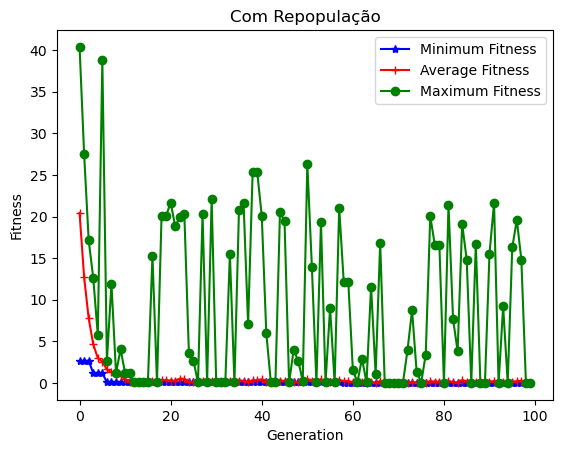

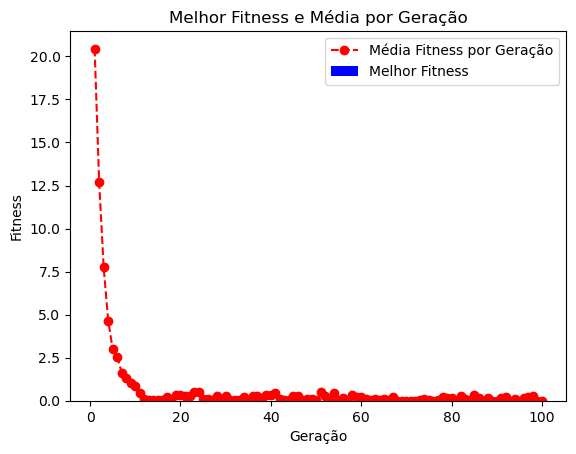

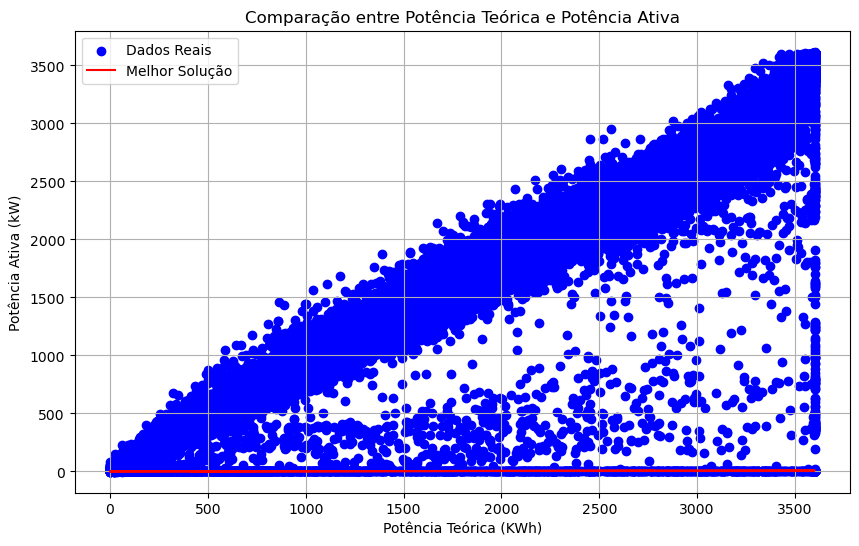

Total execution time: 9.45 seconds


In [2]:




def main():
    tempo1 = time.time()


    #Setup
    params = load_params("/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/db/parameters.json")
    setup = Setup(params)
    #alg = AlgEvolution(setup)
    alg = AlgoritimoEvolutivoRCE(setup)
    data_visual = DataExploration()

    pop_with_repopulation, logbook_with_repopulation, best_variables = alg.run(
        RCE=True,
        fitness_function=rastrigin_decisionVariables,
        decision_variables=(X, y),
        
        )
    print("\nEvolução concluída  - 100%")




    # Salvar resultados
    all_df = data_visual.displayDataFrameInfo(alg.allIndividualValuesArray, "\n\nTodos Individuos Gerados")
    print("\n\n-->Conjunto Elite:", alg.pop_RCE)
    best_df = pd.DataFrame(alg.pop_RCE)
    display(best_df.sort_values(by = "Fitness" ,ascending=False))


    

    
    # Visualização dos resultados
    print("\n\nVISUALIZANDO OS RESULTADOS")
    #TODO data_visual.displayDataFrameInfo(alg.best_individual_array, "Best 100 variables with repopulation")
    data_visual.visualize(
        logbook_with_repopulation, pop_with_repopulation, repopulation=True
    )
    #data_visual.statistics_per_generation_df(logbook_with_repopulation)
    data_visual.plot_scatter_turbina(turbina,best_variables[0])



    tempo2 = time.time()
    print(f"Total execution time: {round(tempo2-tempo1,2)} seconds")
main()  




## Turbina na mao

,Data/hora,ActivePower(kW),WindSpeed(m/s),Curva_Teórica(KWh),Direção do Vento
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data/hora           50530 non-null  object 
 1   ActivePower(kW)     50530 non-null  float64
 2   WindSpeed(m/s)      50530 non-null  float64
 3   Curva_Teórica(KWh)  50530 non-null  float64
 4   Direção do Vento    50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB
None


/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Melhor solução encontrada: [0.9334759011644713]


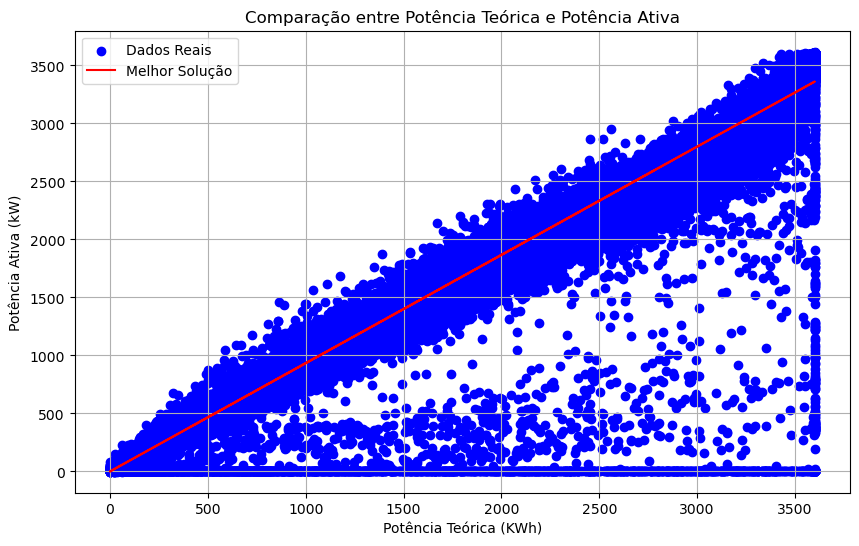

Melhor solução encontrada para a função Rastrigin: [-2.223985253348541, 12.679300605910486, -1.620600794899252, -2.151440709644073, -47.46249854269534, 2447199.60507901, 2.961637059530571, -22.001534687534672, 4.4079746314636425, -66.44566221523634]


In [3]:
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms
import random
import matplotlib.pyplot as plt

# Carregar os dados
turbina = pd.read_csv('/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/assets/datasets/T1.csv')
turbina.columns = ['Data/hora', 'ActivePower(kW)', 'WindSpeed(m/s)', 'Curva_Teórica(KWh)',"Direção do Vento"]
display(turbina.head())

print(turbina.info())

# Definir a função de aptidão (fitness function) para a Turbina
def fitness_function_turbina(individual):
    # Calcular a diferença absoluta entre a potência ativa medida e a potência teórica esperada
    diff = abs(turbina['ActivePower(kW)'] - individual * turbina['Curva_Teórica(KWh)'])
    # Calcular a aptidão como a negação da diferença, para maximizar a semelhança
    return -np.mean(diff),

# Definir a função de aptidão (fitness function) para a função Rastrigin
def fitness_function_rastrigin(individual):
    # Implementação da função Rastrigin
    A = 10
    n = len(individual)
    sum_term = sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in individual])
    return -A * n + sum_term,

# Definir o tamanho da população e o intervalo de valores para as variáveis de decisão
POP_SIZE = 100
VAR_LOWER = 0.0
VAR_UPPER = 2.0

# Criar tipos de indivíduo e de fitness para o algoritmo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Inicializar a população e as ferramentas do algoritmo genético
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, VAR_LOWER, VAR_UPPER)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness_function_turbina)  # Usar a função de aptidão para a Turbina
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Criar a população inicial
pop = toolbox.population(n=POP_SIZE)

# Executar o algoritmo evolutivo
NGEN = 50
for gen in range(NGEN):
    # Selecionar os indivíduos para reprodução
    offspring = toolbox.select(pop, len(pop))
    # Clonar os indivíduos selecionados
    offspring = [toolbox.clone(ind) for ind in offspring]

    # Aplicar crossover e mutação
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.5:
            toolbox.mate(child1, child2)  # Corrigir este trecho
            del child1.fitness.values
            del child2.fitness.values
    for mutant in offspring:
        if random.random() < 0.2:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Avaliar a aptidão dos novos indivíduos
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Substituir a população pela nova geração
    pop[:] = offspring

# Selecionar o melhor indivíduo da população final
best_ind = tools.selBest(pop, 1)[0]

print("Melhor solução encontrada:", best_ind)

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(turbina['Curva_Teórica(KWh)'], turbina['ActivePower(kW)'], label='Dados Reais', color='blue')
plt.plot(turbina['Curva_Teórica(KWh)'], best_ind[0] * turbina['Curva_Teórica(KWh)'], label='Melhor Solução', color='red')
plt.xlabel('Potência Teórica (KWh)')
plt.ylabel('Potência Ativa (kW)')
plt.title('Comparação entre Potência Teórica e Potência Ativa')
plt.legend()
plt.grid(True)
plt.show()

# Definir o tamanho da população e o intervalo de valores para as variáveis de decisão para a função Rastrigin
POP_SIZE_RASTRIGIN = 100
VAR_LOWER_RASTRIGIN = -5.12
VAR_UPPER_RASTRIGIN = 5.12

# Inicializar a população e as ferramentas do algoritmo genético para a função Rastrigin
toolbox_rastrigin = base.Toolbox()
toolbox_rastrigin.register("attr_float", random.uniform, VAR_LOWER_RASTRIGIN, VAR_UPPER_RASTRIGIN)
toolbox_rastrigin.register("individual", tools.initRepeat, creator.Individual, toolbox_rastrigin.attr_float, n=10)  # 10 variáveis para a função Rastrigin
toolbox_rastrigin.register("population", tools.initRepeat, list, toolbox_rastrigin.individual)
toolbox_rastrigin.register("evaluate", fitness_function_rastrigin)  # Usar a função de aptidão para a função Rastrigin
toolbox_rastrigin.register("mate", tools.cxBlend, alpha=0.5)
toolbox_rastrigin.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox_rastrigin.register("select", tools.selTournament, tournsize=3)

# Criar a população inicial para a função Rastrigin
pop_rastrigin = toolbox_rastrigin.population(n=POP_SIZE_RASTRIGIN)

# Executar o algoritmo evolutivo para a função Rastrigin
for gen in range(NGEN):
    # Selecionar os indivíduos para reprodução
    offspring = toolbox_rastrigin.select(pop_rastrigin, len(pop_rastrigin))
    # Clonar os indivíduos selecionados
    offspring = [toolbox_rastrigin.clone(ind) for ind in offspring]

    # Aplicar crossover e mutação
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.5:
            toolbox_rastrigin.mate(child1, child2)  # Corrigir este trecho
            del child1.fitness.values
            del child2.fitness.values
    for mutant in offspring:
        if random.random() < 0.2:
            toolbox_rastrigin.mutate(mutant)
            del mutant.fitness.values

    # Avaliar a aptidão dos novos indivíduos
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox_rastrigin.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Substituir a população pela nova geração
    pop_rastrigin[:] = offspring

# Selecionar o melhor indivíduo da população final para a função Rastrigin
best_ind_rastrigin = tools.selBest(pop_rastrigin, 1)[0]

print("Melhor solução encontrada para a função Rastrigin:", best_ind_rastrigin)


(50530, 1) (50530, 1)
Mean Squared Error: 292677.2876232669


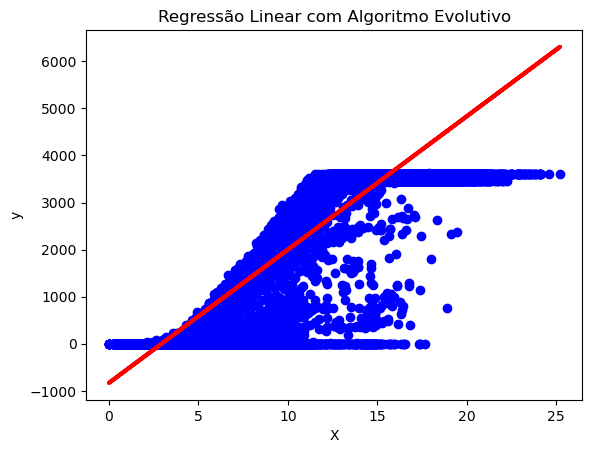

In [4]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from deap import base, creator, tools, algorithms
import random

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Selecionar características e separar em X e y
X = turbina[['WindSpeed(m/s)']].values
y = turbina[['ActivePower(kW)']].values

print(X.shape,y.shape)

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criação e ajuste do modelo de regressão linear
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Avaliação do desempenho do modelo nos dados de teste
y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Plotar os dados e a linha de regressão
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue')
plt.plot(X, regression_model.predict(X), color='red', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear com Algoritmo Evolutivo')
plt.show()


In [5]:
!xhost +

access control disabled, clients can connect from any host


In [6]:
import tkinter as Tkinter
import pyautogui
import mouseinfo


pyautogui.position()

Point(x=588, y=226)

## Circuito Eletrico

In [7]:
def fitness_function_lei_ohm(individual, decision_variables):
    voltagem, amperagem = decision_variables
    individual = np.repeat(individual, len(voltagem) // len(individual))  
    return np.mean(np.abs(voltagem / amperagem - individual))



# Carregar dados e separá-los em X e y
num_samples = 100
voltagem = 120  # Volts
amperagem = 10  # Amps
dados_circuito = {
    'Voltagem': np.full(num_samples, voltagem),
    'Amperagem': np.full(num_samples, amperagem),
    'Resistencia': np.random.uniform(0.1, 10, num_samples),  # Valores aleatórios para a resistência
}


# Calcular a potência usando a lei de Ohm: V = RI => R = V/I
dados_circuito['Potencia'] = dados_circuito['Voltagem'] * dados_circuito['Amperagem']

# Criar DataFrame
df_circuito = pd.DataFrame(dados_circuito)

X = df_circuito['Voltagem'].values
y = df_circuito['Amperagem'].values
display(df_circuito)
print(X.shape,y.shape)

,Voltagem,Amperagem,Resistencia,Potencia
0,120,10,9.936313,1200
1,120,10,0.726737,1200
2,120,10,9.053649,1200
3,120,10,8.226116,1200
4,120,10,8.570440,1200
...,...,...,...,...
95,120,10,9.318271,1200
96,120,10,8.278581,1200
97,120,10,4.649923,1200
98,120,10,1.206116,1200


(100,) (100,)


Método escolhido: Minimizar

RCE being applied!  - Generation = 20 


/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/pedrov/.local/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


TAMANHO ATUAL DE TODOS INDIVIDUOS 2000


Melhor da geração: 1
Name: Generations, dtype: int64


,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,1,0,"[0.826267523861924, 0.6225408003552291, 0.9473...",0.0,0.0,0.0,-


0.0

	 CRITÉRIO 1 RCE - 30% dos melhores fitness de cada geração


	 CRITÉRIO 2 - Comparar as variáveis de decisão de cada indivíduo e verificar se existem 3 diferentes.

Indivíduo Index(12) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(50) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(98) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(90) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(83) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(63) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(82) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(78) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(15) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(70) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(75) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(27) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(10) difer

,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,1,0,"[0.826267523861924, 0.6225408003552291, 0.9473...",0.0,0.0,0.0,-


0.0

	 CRITÉRIO 1 RCE - 30% dos melhores fitness de cada geração


	 CRITÉRIO 2 - Comparar as variáveis de decisão de cada indivíduo e verificar se existem 3 diferentes.

Indivíduo Index(76) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(45) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(94) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(56) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(84) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(7) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(2) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(38) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(42) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(40) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(33) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(59) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(69) diferen

,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,1,0,"[0.826267523861924, 0.6225408003552291, 0.9473...",0.0,0.0,0.0,-


0.0

	 CRITÉRIO 1 RCE - 30% dos melhores fitness de cada geração


	 CRITÉRIO 2 - Comparar as variáveis de decisão de cada indivíduo e verificar se existem 3 diferentes.

Indivíduo Index(44) diferente adicionado ao conjunto elite:  O.O  
Conjunto Elite atualizado!  ultimo inserido =  {'Generations': 60, 'index': 44, 'Variaveis de Decisão': [4.093987253283827, 3.504094983898224, 7.234540989012451, 5.389567261576164, 2.8130964110175505, 6.538934812458484, 5.718914438247487, 1.66885062957197, 4.764273065286382, 2.4977175975083035], 'Fitness': 7.5776022558139156, 'Media': 7.391853921986832, 'Desvio Padrao': 0.09387771617645443, 'RCE': ' - '}

	 CRITERIO 3 - CONJUNTO ELITE (20%) com o restante aleatorio(80%)

Taxa Candidatos elite (20% de 91) = 19 | random (80% de 100)= 80.0

RCE being applied!  - Generation = 80 
TAMANHO ATUAL DE TODOS INDIVIDUOS 8000


Melhor da geração: 1
Name: Generations, dtype: int64


,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,1,0,"[0.826267523861924, 0.6225408003552291, 0.9473...",0.0,0.0,0.0,-


0.0

	 CRITÉRIO 1 RCE - 30% dos melhores fitness de cada geração


	 CRITÉRIO 2 - Comparar as variáveis de decisão de cada indivíduo e verificar se existem 3 diferentes.

Indivíduo Index(71) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(53) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(37) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(41) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(73) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(57) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(4) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(49) diferente adicionado ao conjunto elite:  O.O  
Indivíduo Index(35) diferente adicionado ao conjunto elite:  O.O  
Conjunto Elite atualizado!  ultimo inserido =  {'Generations': 80, 'index': 35, 'Variaveis de Decisão': [6.382355649619861, 4.981518509299587, 11.140714676466649, 6.78453304077475, 3.823140343951187, 6.538934812458484, 8.531032

,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,1,0,"[0.826267523861924, 0.6225408003552291, 0.9473...",0.0,0.0,0.0,-


0.0

	 CRITÉRIO 1 RCE - 30% dos melhores fitness de cada geração


	 CRITÉRIO 2 - Comparar as variáveis de decisão de cada indivíduo e verificar se existem 3 diferentes.

Nenhum indivíduo atende aos critérios.

	 CRITERIO 3 - CONJUNTO ELITE (20%) com o restante aleatorio(80%)

Taxa Candidatos elite (20% de 100) = 20 | random (80% de 100)= 80.0

Evolução concluída  - 100%


Todos Individuos Gerados


,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,1,0,"[0.826267523861924, 0.6225408003552291, 0.9473...",0.000000,0.000000,0.000000,-
1,1,1,"[0.1492827951856981, 0.9873045388008184, 0.551...",0.000000,0.000000,0.000000,-
2,1,2,"[0.733438777587989, 0.5456766742696576, 0.8084...",0.000000,0.000000,0.000000,-
3,1,3,"[0.4602435118340925, 0.7519058621431332, 0.482...",0.000000,0.000000,0.000000,-
4,1,4,"[0.5924006093362384, 0.46726912017274613, 0.25...",0.000000,0.000000,0.000000,-
...,...,...,...,...,...,...,...
9995,100,95,"[10.466018405614983, 4.981518509299587, 11.908...",4.104390,4.130482,0.109335,-
9996,100,96,"[10.466018405614983, 4.981518509299587, 11.140...",4.274867,4.130482,0.109335,-
9997,100,97,"[10.466018405614983, 4.981518509299587, 11.908...",4.032205,4.130482,0.109335,-
9998,100,98,"[8.629248734697812, 4.981518509299587, 11.1407...",4.330412,4.130482,0.109335,-




-->Conjunto Elite: [{'Generations': 2, 'index': 12, 'Variaveis de Decisão': [0.039589374834915536, -1.3544358261026168, -0.408143293016455, 0.36701285142876316, 0.8775003479877312, 2.0071448595841557, 0.07783459191272701, 0.3427511056947993, 0.4992614065575023, 0.37237013813664843], 'Fitness': 11.717911444298183, 'Media': 11.051660168306505, 'Desvio Padrao': 2.257555017562281, 'RCE': ' - '}, {'Generations': 7, 'index': 50, 'Variaveis de Decisão': [0.8448400718616711, 0.18136018170279145, 0.6426551608580242, 0.9526934807107054, 0.1968250130732241, 2.3767371456512114, 0.5437759346781559, 0.9860294650288888, 0.7550407090269344, 0.2887475510808133], 'Fitness': 11.223129528632755, 'Media': 11.102136535706025, 'Desvio Padrao': 0.07394519733466626, 'RCE': ' - '}, {'Generations': 9, 'index': 98, 'Variaveis de Decisão': [-0.2289034251249552, 0.5201041167006252, 0.9867304398482225, 0.9012395999087962, 0.05791761623271341, 2.3767371456512114, 0.9911841052960613, 1.66885062957197, 0.755040709026

,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,2,12,"[0.039589374834915536, -1.3544358261026168, -0...",11.717911,11.051660,2.257555,-
2,9,98,"[-0.2289034251249552, 0.5201041167006252, 0.98...",11.250496,11.006356,0.064323,-
1,7,50,"[0.8448400718616711, 0.18136018170279145, 0.64...",11.223130,11.102137,0.073945,-
10,17,75,"[-0.2443454359007804, 0.8909657925129044, 0.98...",10.907173,10.464480,0.120049,-
5,16,63,"[0.8892914135444692, 0.8909657925129044, 0.790...",10.805001,10.564647,0.124227,-
...,...,...,...,...,...,...,...
95,64,73,"[4.093987253283827, 3.504094983898224, 8.83331...",7.177223,7.111738,0.098833,-
96,73,57,"[6.382355649619861, 3.6006010041105405, 8.8333...",6.603557,6.415621,0.184537,-
97,75,4,"[6.382355649619861, 4.981518509299587, 8.83331...",6.477683,6.148063,0.123199,-
98,75,49,"[6.382355649619861, 3.6006010041105405, 11.140...",6.269576,6.148063,0.123199,-



Results RCE


,Generations,index,Variaveis de Decisão,Fitness,Media,Desvio Padrao,RCE
0,2,12,"[0.039589374834915536, -1.3544358261026168, -0...",11.717911,11.051660,2.257555,SIM
1,7,50,"[0.8448400718616711, 0.18136018170279145, 0.64...",11.223130,11.102137,0.073945,SIM
2,9,98,"[-0.2289034251249552, 0.5201041167006252, 0.98...",11.250496,11.006356,0.064323,SIM
3,15,90,"[0.7574885007326284, 0.8909657925129044, 0.986...",10.797404,10.655241,0.110208,SIM
4,15,83,"[0.7574885007326284, 2.051172431761359, 0.8147...",10.771186,10.655241,0.110208,SIM
...,...,...,...,...,...,...,...
95,64,73,"[4.093987253283827, 3.504094983898224, 8.83331...",7.177223,7.111738,0.098833,SIM
96,73,57,"[6.382355649619861, 3.6006010041105405, 8.8333...",6.603557,6.415621,0.184537,SIM
97,75,4,"[6.382355649619861, 4.981518509299587, 8.83331...",6.477683,6.148063,0.123199,SIM
98,75,49,"[6.382355649619861, 3.6006010041105405, 11.140...",6.269576,6.148063,0.123199,SIM




VISUALIZANDO OS RESULTADOS
Soluções do problema

Best solution index =  0

Best solution variables =
 [8.629248734697812, 4.981518509299587, 11.908588074849918, 7.249415980907201, 4.267311604353712, 6.829325812185145, 11.991626717938164, 4.053123702366563, 8.977015306760888, 6.164922695803122]

Best solution fitness =  0.0

Ótimo global da função Rastrigin =  637.7421275812424

Solução ótima global =  [ 8.95400109  4.97469125 11.93796291  6.96442256  3.97978442  6.96442231
 11.93796257  3.97978388  8.95400109  5.96957265]

Porcentagem de proximidade da solução em relação ao ótimo global =  100.0 %

Distância da solução em relação ao ótimo global = <built-in function abs>
100 100 100


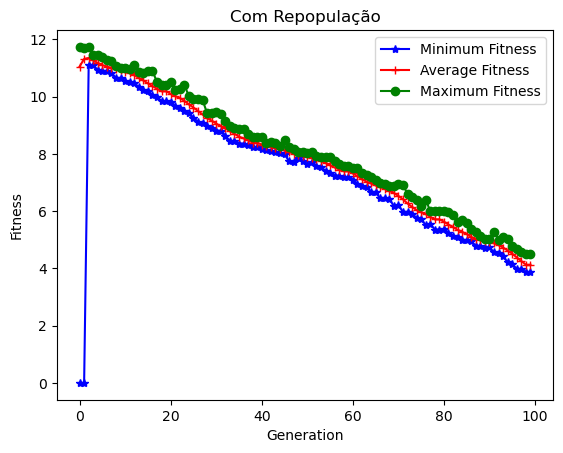

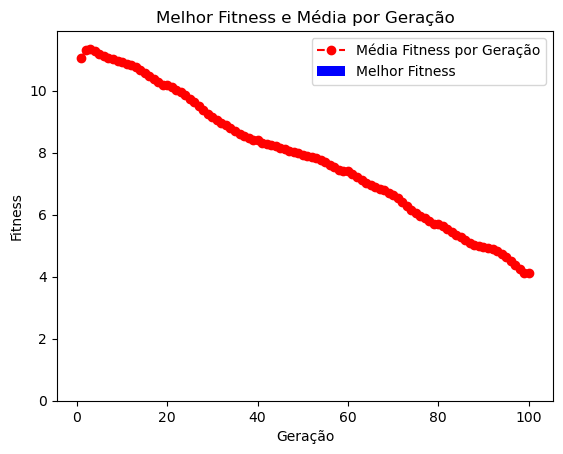

Total execution time: 6.56 seconds


In [8]:
import time
import pandas as pd
import numpy as np
import math




# Definição da função main
def main():
    tempo1 = time.time()


    # Inicializar as classes necessárias
    params = load_params("/home/pedrov/Documentos/GitHub/Engenharia-Eletrica-UFF/Iniciação Cientifica - Eng Eletrica UFF/evolution_rce_master/src/db/parameters.json")
    setup = Setup(params)
    alg = AlgEvolution(setup)
    data_visual = DataExploration()

    # Executar o algoritmo de evolução
    pop_with_repopulation, logbook_with_repopulation, best_variables = alg.run(
        RCE=True,
        fitness_function= fitness_function_lei_ohm,
        decision_variables=(X, y),
    )
    print("\nEvolução concluída  - 100%")

    # Exibir resultados
    all_df = data_visual.displayDataFrameInfo(alg.allIndividualValuesArray, "\n\nTodos Individuos Gerados")
    print("\n\n-->Conjunto Elite:", alg.pop_RCE)
    best_df = pd.DataFrame(alg.pop_RCE)
    display(best_df.sort_values(by="Fitness", ascending=False))

    print("\nResults RCE")
    alg.combinar_aleatoriamente()

    # Visualização dos resultados
    print("\n\nVISUALIZANDO OS RESULTADOS")
    data_visual.visualize(
        logbook_with_repopulation, pop_with_repopulation, repopulation=True
    )

    tempo2 = time.time()
    print(f"Total execution time: {round(tempo2-tempo1,2)} seconds")

main()
